# Audio 1: Sine waves

This notebook is part of [_The Joy of Jupyter_](https://github.com/mwermelinger/The-Joy-of-Jupyter), an introduction on how to use Jupyter notebooks and what can be done with them. 

This notebook shows how to synthesise a note or a chord using sine waves, and play it.

I'm not an audio expert. The explanations below are based on my own (possibly incorrect and definitely incomplete) understanding of how sound works. 

## Introduction

Sound is usually perceived by vibrations of air molecules on our eardrum (a membrane). 
Similarly, a condenser microphone and a loudspeaker use a membrane to capture or generate sound.

A higher pitched sound will make the membrane vibrate more rapidly.
The number of vibrations per second is called the **frequency** of the sound.
Frequency is measured in Hertz (abbreviated Hz), which means "per second".
Humans can hear frequencies from 20 to 20,000 Hz, roughly. 

A louder sound will make the membrane vibrate more widely, 
i.e. it will be displaced further from its resting position. 
The displacement is the volume of the sound.

Digital systems can't store continuous vibrations, only a sequence of numbers. To record sound
the displacement of the microphone membrane has to be sampled at discrete points in time.
Each sample is a number indicating how much the membrane is displaced from its resting position. The number 0 indicates the membrane is at rest, positive numbers indicate displacement in one direction, negative numbers in the other.

The sampling rate is the number of samples per second and thus also indicated in Hertz.
The higher the sampling rate, the more faithful the recording is to the original sound, 
but also the more memory is needed to store all the samples. 
There is also a relation between sampling rate and frequency: 
the highest frequency that can be recorded is half the sampling rate. 
To capture the highest frequencies heard by humans,
CD-quality music is recorded at 44,100 samples per second. 

## Generating noise

To play some sound, all we need to do is to send a sequence of numbers to the loudspeaker,
together with the sampling rate, so that the loudspeaker knows how fast to play the samples.

The Jupyter notebook audio player can take a list of floating point numbers from -1 to 1,
interpreting -1 and 1 as the maximum displacements possible.

Let's start by generating 2 seconds of CD-quality noise. 

In [1]:
sampling_rate = 44100 # samples per second
duration = 2 # seconds

import random

noise = [0] * duration * sampling_rate
for sample in range(len(noise)):
    noise[sample] = random.uniform(-1, 1)

The notebook's audio player only needs the data to play and the rate at which to play. 

In [2]:
from IPython.display import Audio

Audio(data=noise, rate=sampling_rate)

**Activity:** From what I wrote in the introduction, what will happen if you lower the sampling rate? Try it out: replace 44100 in the code by successively lower values, e.g. 20000, 5000 and 1000. Note that at low rates, the audio player's timing interface doesn't work well.

## Generating a note
Music often uses [equal temperament](https://en.wikipedia.org/wiki/Equal_temperament) tuning, 
in which the ratio between the frequencies of adjacent keys on the piano is always the same.
For example, the ratio between the frequencies of C and C# (C sharp)
is the same as the ratio between the frequencies of E and F.
The ratio between two notes that are an octave (12 keys) apart is 2.
Octaves are numbered from 0 onwards, octave 0 including the lowest notes humans can hear. 
The bottom key on an 88-key piano is $A_0$, the top key is $C_8$.
Middle C is $C_4$. $A_4$ (the A above middle C) is usually tuned to a frequency of 440Hz.
From this, the frequency of any other note can be computed.

In [3]:
def frequency(steps):
    """Return the frequency of the given note on the equal-tempered scale.
    Steps is an integer, the number of half-notes (up or down) from A4.
    """
    # the frequency of A4 (A above middle C) is 440 Hz
    return 440 * 2 ** (steps / 12)

Calculating by hand the frequencies of some notes shows that the formula doubles the frequency every octave.

$A_3 = steps(-12) = 440 \times 2^{-12/12} = 440 \times 2^{-1} = 440 \times 1/2 = 220$

$A_4 = steps(0) = 440 \times 2^{0/12} = 440 \times 2^0 = 440 \times 1 = 440$

$A_5 = steps(12) = 440 \times 2^{12/12} = 440 \times 2^1 = 440 \times 2 = 880$

I can now calculate the frequencies of the C major chord on middle C, to use later.

In [4]:
G4 = frequency(-2) # 1 note (2 steps) below A4
E4 = frequency(-5) # 1.5 notes (3 steps) below G4
C4 = frequency(-9) # 2 notes (4 steps) below E4

To generate a pure note (instead of noise) we take the sine function, from trigonometry. 
As $x$ grows, $sin(x)$ 'oscillates' between -1 and 1, making the sine function 
ideal to represent the regular and smooth back and forth displacement of a membrane,
as this graph from Wikimedia Commons shows. 

<a title="By Geek3 [GFDL (http://www.gnu.org/copyleft/fdl.html) or CC BY 3.0 (https://creativecommons.org/licenses/by/3.0)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Sine_one_period.svg"><img width="512" alt="Sine one period" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Sine_one_period.svg/512px-Sine_one_period.svg.png"/></a>

As $x$ reaches $2\pi$, the function will start repeating itself.
To generate a note with frequency $f$ we need to generate a 
[sine wave](https://en.wikipedia.org/wiki/Sine_wave) that has $f$
oscillations (peaks and troughs) per second.

In [5]:
from math import sin, pi

def sine_wave(frequency, duration, rate):
    """Return a sine wave of the given frequency and duration for the given sampling rate.
    
    frequency: a positive float representing oscillations per second
    duration: a positive integer representing seconds
    rate: a positive integer representing number of samples per second
    return: a list of floats in the range -1 to 1
    """
    wave = [0] * duration * rate
    time_per_sample = 1 / rate 
    for sample in range(len(wave)):
        time = time_per_sample * sample
        wave[sample] = sin(2 * pi * frequency * time)
    return wave

Let's generate 2 seconds of a CD-quality $A_4$. 

In [6]:
CD = 44100
a4 = sine_wave(440, 2, CD)
Audio(data=a4, rate=CD)

We can see the sine wave generated. I will only plot the first 1000 samples.

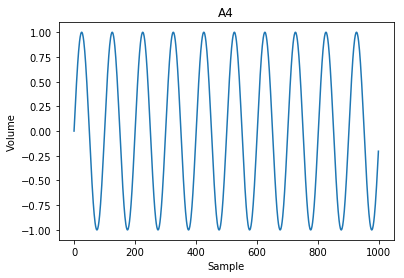

In [7]:
from matplotlib.pyplot import *
%matplotlib inline

title('A4')
xlabel('Sample')
ylabel('Volume')
plot(a4[:1000])
show()

Let's play another note and see its sine wave.

In [8]:
c4 = sine_wave(C4, 2, CD)
Audio(data=c4, rate=CD)

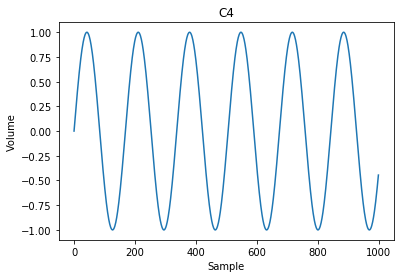

In [9]:
title('C4')
xlabel('Sample')
ylabel('Volume')
plot(c4[:1000])
show()

As the plot shows, $C_4$ has a lower frequency: it has 6 almost complete oscillations in the first 1000 samples, whereas $A_4$ has 10.

## Generating a chord

A chord can be generated by adding the 3 separate sine waves, and dividing by 3 to keep the
displacement at each point between -1 and 1.

In [10]:
e4 = sine_wave(E4, 2, CD)
g4 = sine_wave(G4, 2, CD)
c_major_chord = [0] * len(c4)
for sample in range(len(c4)):
    c_major_chord[sample] = (c4[sample] + e4[sample] + g4[sample]) / 3

Audio(data=c_major_chord, rate=CD)

Let's see the sound wave.

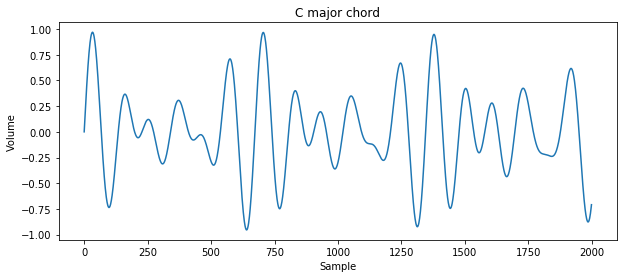

In [11]:
figure(figsize=(10,4)) # make the chart wider to show more samples
title('C major chord')
xlabel('Sample')
ylabel('Volume')
plot(c_major_chord[:2000])
show()